<a href="https://colab.research.google.com/github/levi178u/Titanic-/blob/main/Titanic_eda_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import sklearn

!pip install catboost

from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier


%matplotlib inline

from sklearn.model_selection import cross_val_score


import warnings
warnings.filterwarnings('ignore')




   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.7 MB/s eta 0:00:00


In [ ]:
df_test =pd.read_csv("/content/test.csv")
df_train =pd.read_csv("/content/train.csv")
df_ss=pd.read_csv("/content/gender_submission.csv")

In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_ss.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
print("Training set shape :",df_train.shape)
print("Testing set shape :",df_test.shape)
print("Submission set shape :",df_ss.shape)

Training set shape : (891, 12)
Testing set shape : (418, 11)
Submission set shape : (418, 2)


In [ ]:
###LET's start with EDA

In [ ]:
# # Data description

# Here I will outline the definitions of the columns in the titanic dataset

# Survived: 0 = Did not survive, 1 = Survived

# Pclass: Ticket class where 1 = First class, 2 = Second class, 3 = Third class. This can also be seen as a proxy for socio-economic status.

# Sex: Male or female

# Age: Age in years, fractional if less than 1

# SibSp: Number of siblings or spouses aboard the titanic

# Parch: Number of parents or children aboard the titanic

# Ticket: Passenger ticket number

# Fare: Passenger fare

# Cabin: Cabin number

# Embarked: Point of embarkation where C = Cherbourg, Q = Queenstown, S = Southampton



In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# we deleted or dropped out the duplicated data
df_train.drop_duplicates()
df_train.duplicated().sum()

0

In [ ]:
# Now working on missing values

df_train.isnull().sum().sort_values(ascending =False)

,0
Cabin,687
Age,177
Embarked,2
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0


In [ ]:
df_test.isnull().sum().sort_values(ascending =False)

,0
Cabin,327
Age,86
Fare,1
PassengerId,0
Pclass,0
Name,0
Sex,0
SibSp,0
Parch,0
Ticket,0


In [ ]:
df_train.fillna(0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<Axes: >

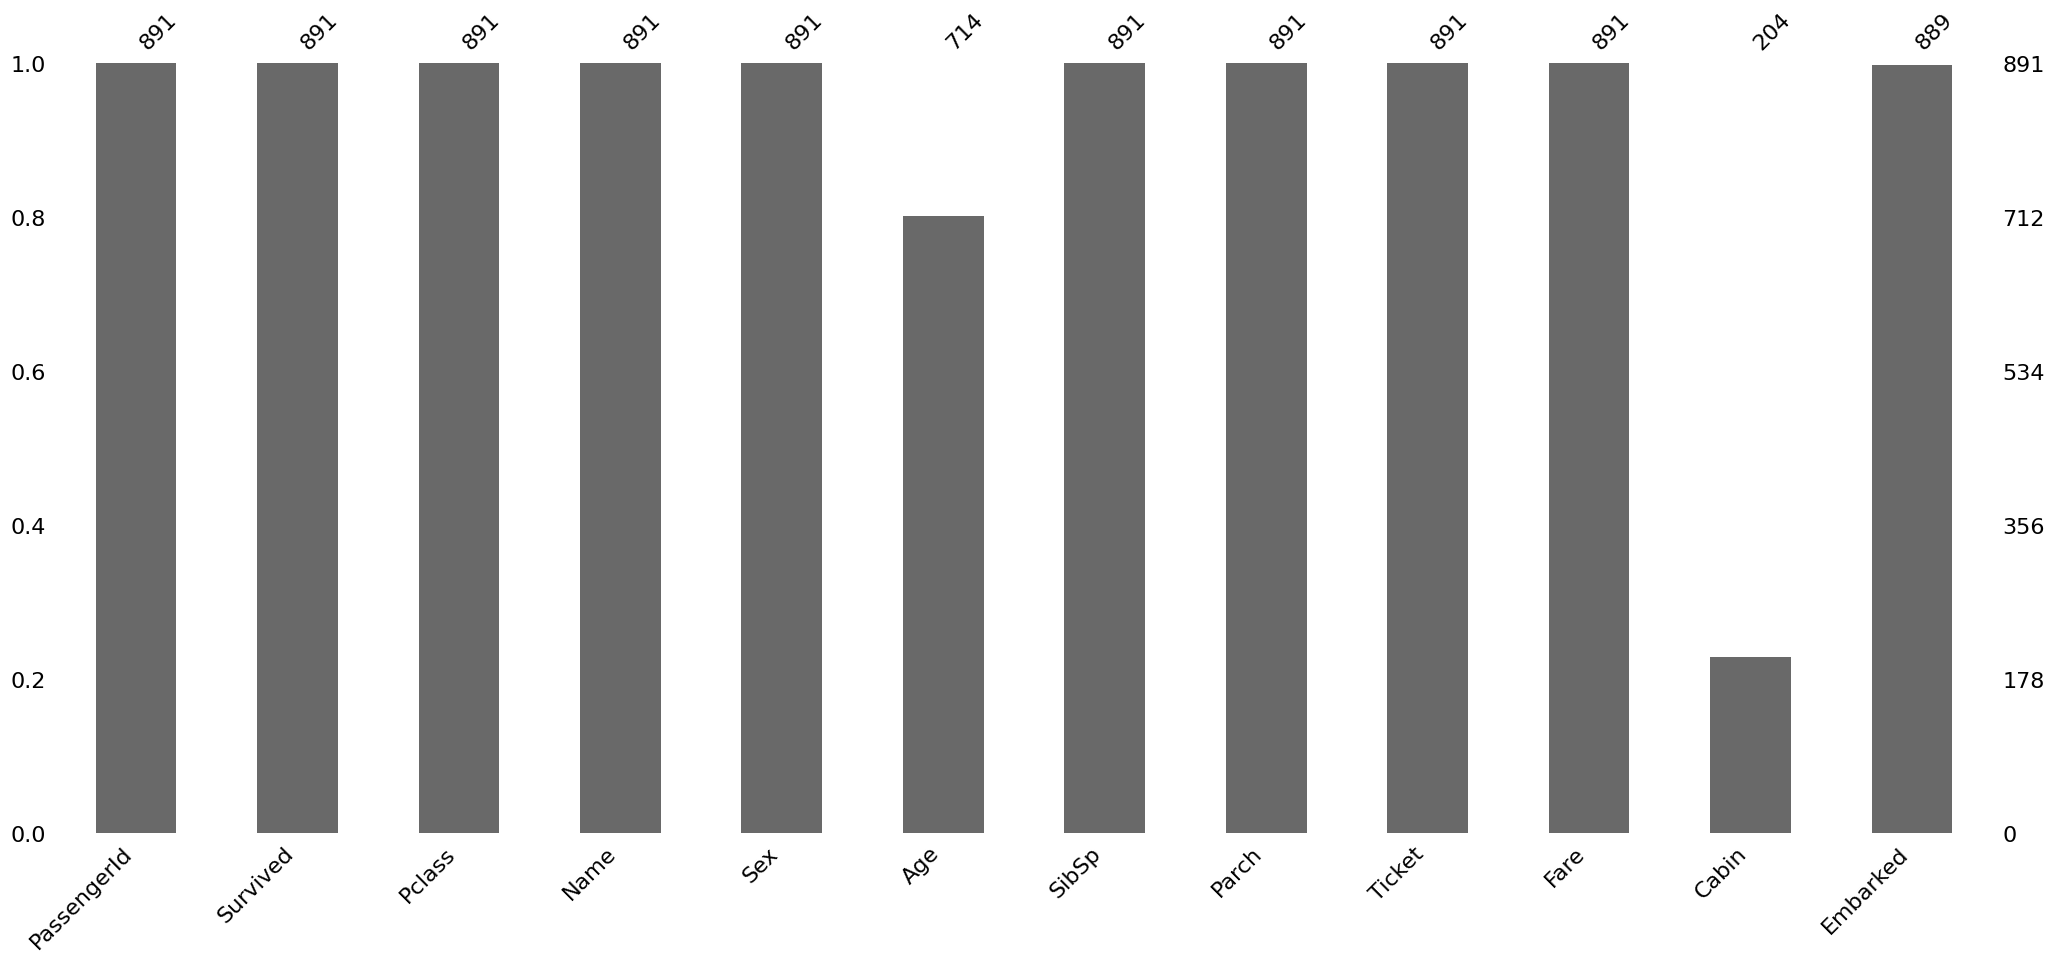

In [ ]:
# let's visualize the missing data elements of the dataset

import missingno as msno
msno.bar(df_train)

<Axes: >

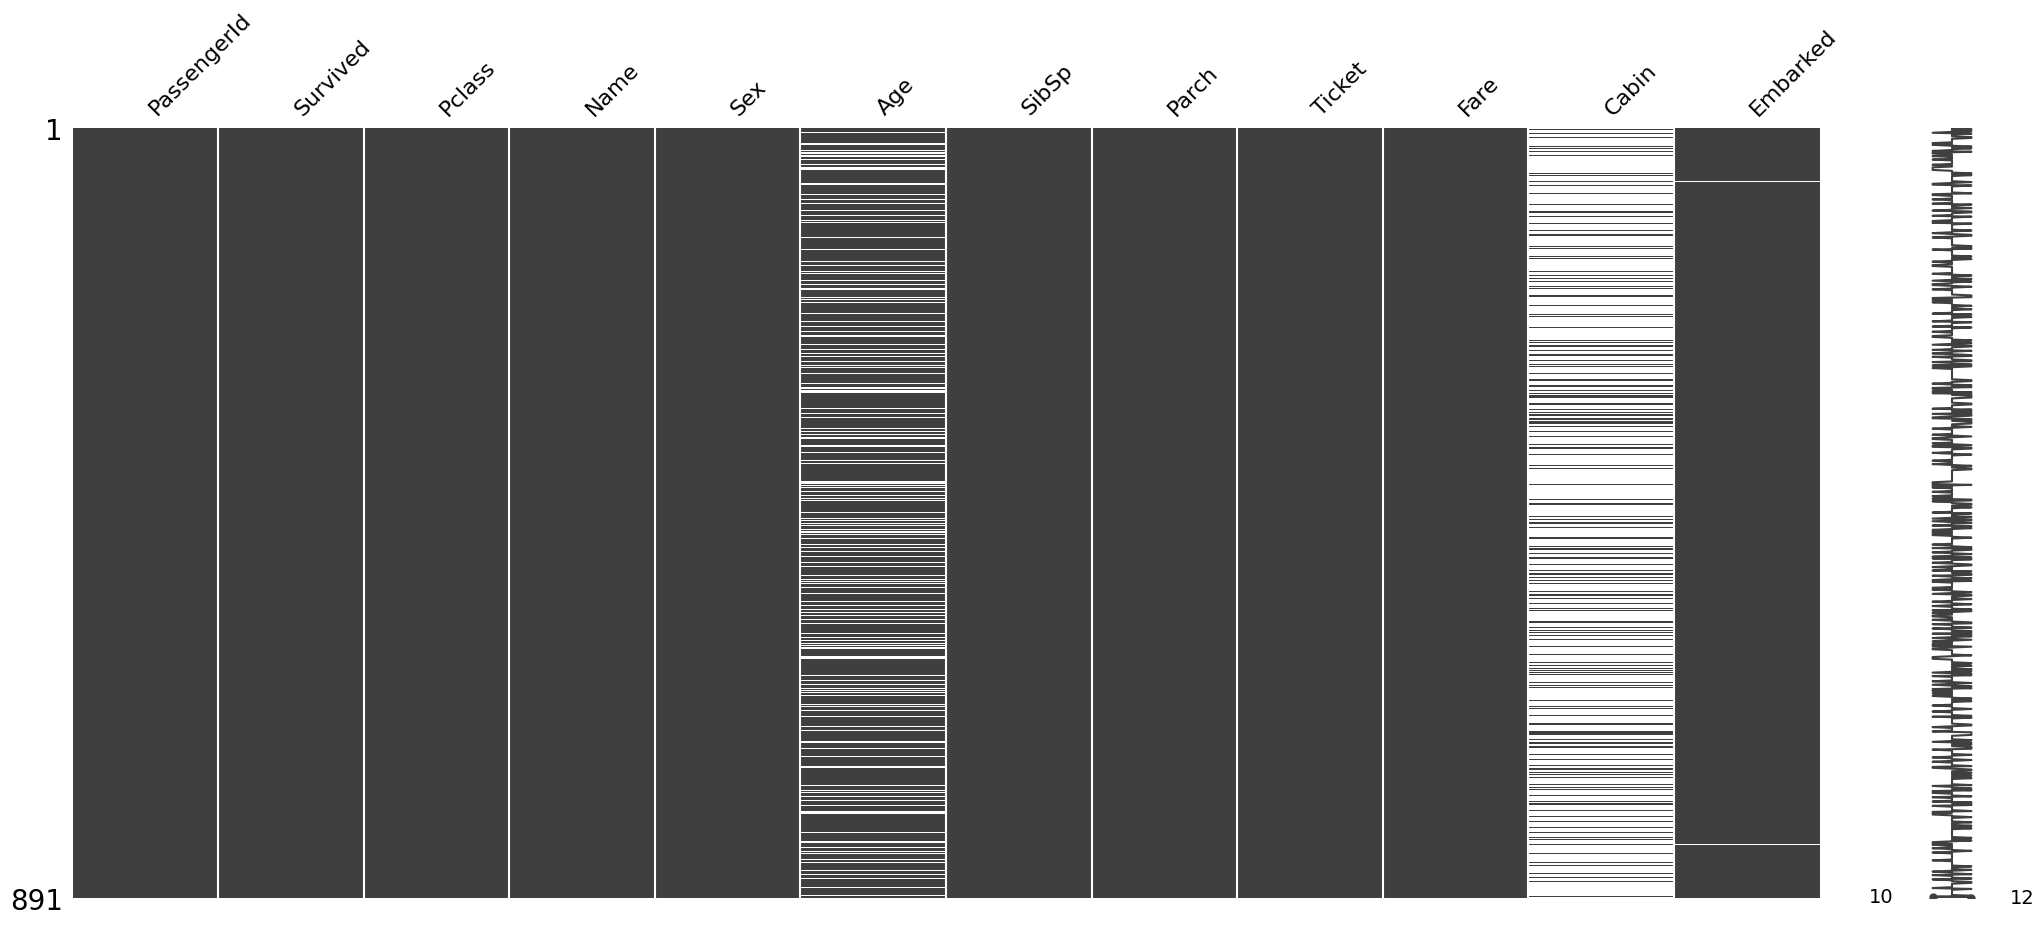

In [ ]:
msno.matrix(df_train)

In [ ]:
df_train.describe()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
# Annalysis via Categotical variable :Sex,

df_train['Sex'].value_counts(dropna = False)

,count
Sex,
male,577
female,314


In [ ]:
# Mean of survival by sex

df_train[['Sex', 'Survived']].groupby('Sex', as_index =False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


Text(0.5, 1.0, 'Survival Probability by Sex')

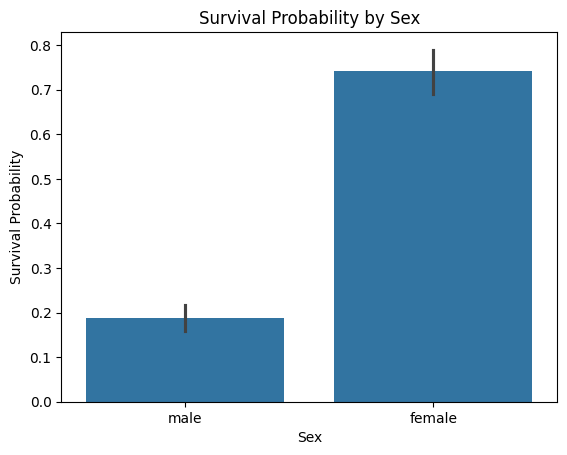

In [ ]:
sns.barplot(x = 'Sex', y = 'Survived', data = df_train)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex')

In [ ]:
df_train['Pclass'].value_counts(dropna = False)

,count
Pclass,
3,491
1,216
2,184


In [ ]:
df_train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Text(0.5, 1.0, 'Survival Probability by Passenger Class')

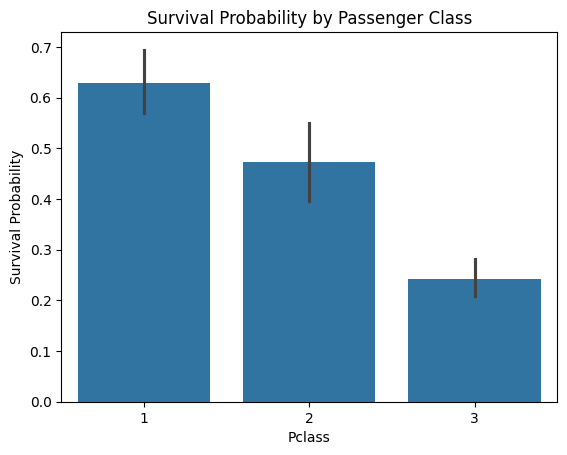

In [ ]:
sns.barplot(x = 'Pclass', y ='Survived', data = df_train )
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Passenger Class')

Text(0.5, 1.0, 'Survival Probability by Sex and Passenger Class')

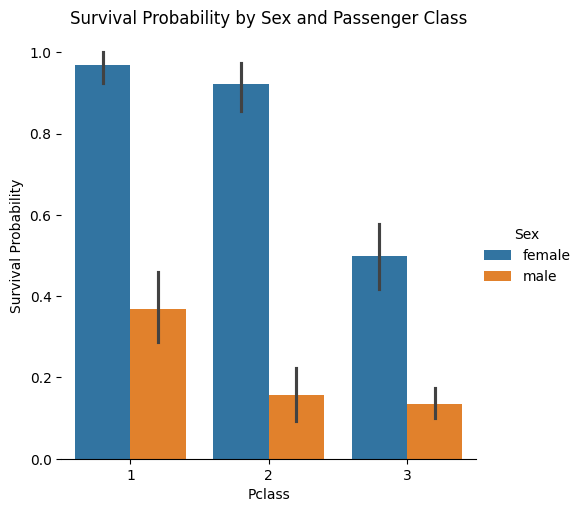

In [ ]:
pg = sns.catplot(x = 'Pclass', y = 'Survived', hue = 'Sex', data = df_train, kind = 'bar')
pg.despine(left = True)
plt.ylabel('Survival Probability')
plt.title('Survival Probability by Sex and Passenger Class')

In [ ]:
df_train['Embarked'].value_counts(dropna = False)

,count
Embarked,
S,644
C,168
Q,77
NaN,2


In [ ]:
df_train[['Embarked', 'Survived']].groupby(['Embarked'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [ ]:
df_train.dropna(axis =1, how ='all')

df_train.reset_index(inplace =True)
df_train.set_index('PassengerId', inplace =True)

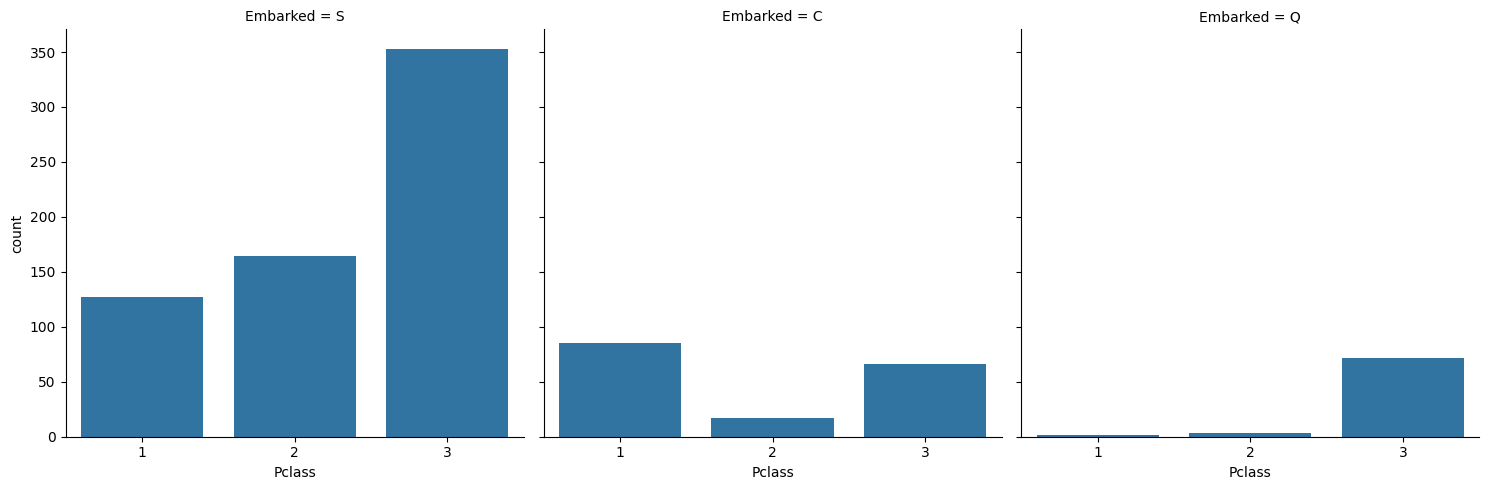

In [ ]:
sns.catplot(x='Pclass', col ='Embarked', data= df_train, kind= 'count')

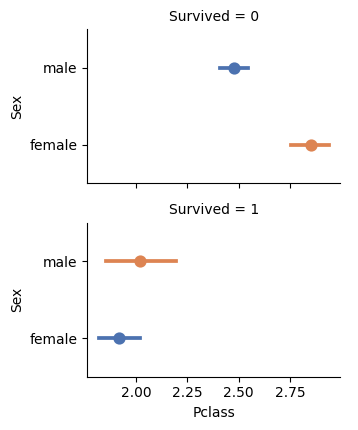

In [ ]:
# Figuring out the survival probabilities of all categorical variables

plo= sns.FacetGrid(data =df_train, row = 'Survived', height = 2.2, aspect = 1.6)
plo.map(sns.pointplot, 'Pclass','Sex', palette ='deep',data =df_train)
plo.add_legend()

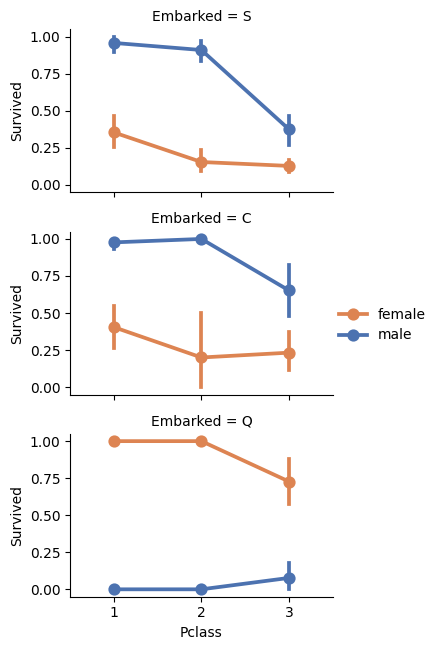

In [ ]:
plo= sns.FacetGrid(df_train, row = 'Embarked', height = 2.2, aspect = 1.6)
plo.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette ='deep',data =df_train)
plo.add_legend()

In [ ]:
mm= df_train.dropna(subset= ['Cabin','Embarked'])
mm.fillna("0", inplace=True)

<Axes: xlabel='Age', ylabel='Density'>

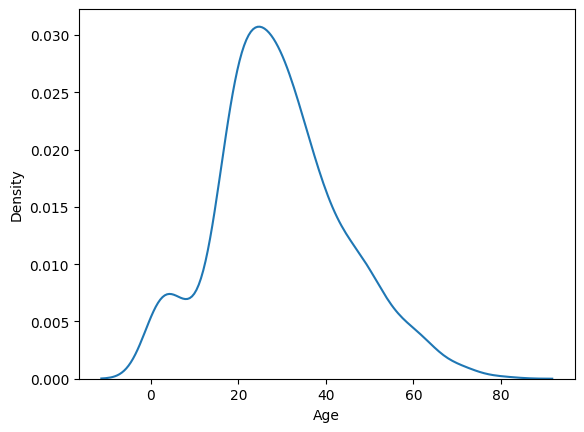

In [ ]:
age= df_train.dropna(subset=['Age'])
age=age['Age'].values
np.median(age)
sns.kdeplot(df_train['Age'])

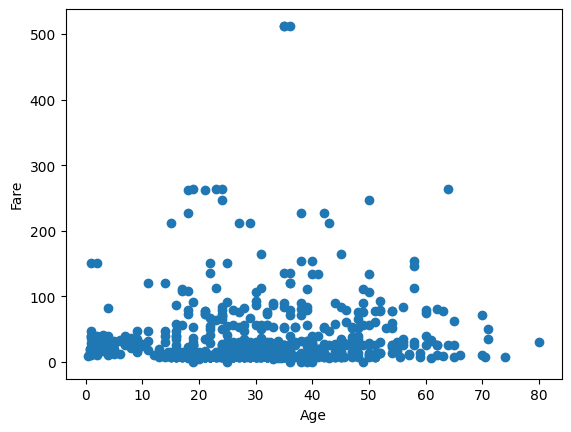

In [ ]:
fare= df_train['Fare'].values
agee= df_train['Age'].values
plt.xlabel("Age")
plt.ylabel("Fare")

plt.scatter(agee, fare)

<Axes: xlabel='Sex', ylabel='Pclass'>

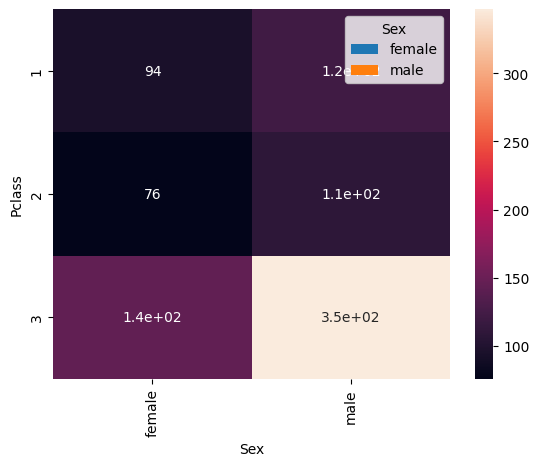

In [ ]:
x= pd.crosstab(df_train['Pclass'],df_train['Sex'])
x.plot(kind='bar')
sns.heatmap(x, annot=True)

<Axes: xlabel='Pclass', ylabel='Age'>

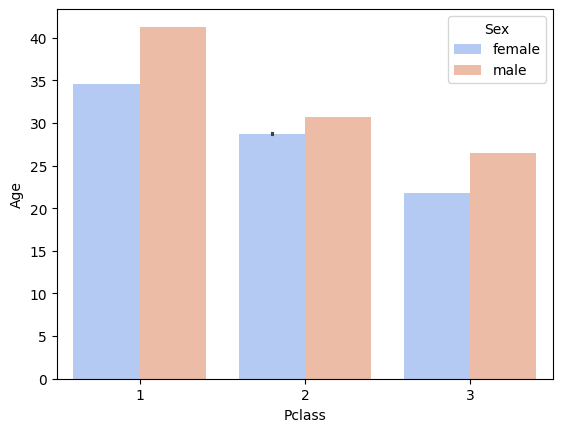

In [ ]:
sns.barplot(x='Pclass', y='Age', hue='Sex', data=df_train, palette ='coolwarm', order=[1,2,3], ci =0.95)
#

In [ ]:
# Removal of outliers from the data

from collections import Counter as Cnt

def detect_outlier(df, n , fex):
  out=[]
  for i in fex:
    if i == 'Survived':
      continue

    df[i] =pd.to_numeric(df[i])
    Q1= np.percentile(df[i], 25)
    Q3= np.percentile(df[i], 75)

    IQR= Q3-Q1

    out_step= 1.5*IQR
    out_low= Q1-out_step
    out_high= Q3+out_step

    out_list= df[(df[i]<out_low) | (df[i]>out_high)].index
    out.extend(out_list)


  out= Cnt(out)
  mout= []
  mout =list(id for id,val in out.items() if val > n )
  return mout


drop = detect_outlier(df_train, 2, ['Age','SibSp', 'Parch', 'Fare'])
print("Dropped indices :", drop)
df_train.drop(df_train.index[drop], inplace=True)

Dropped indices : [28, 89, 160, 181, 202, 325, 342, 793, 847, 864]


In [ ]:
df_train.loc[drop, :]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S


In [ ]:
df_train= df_train.reset_index(drop=True)

In [ ]:
print("{} rows".format(len(df_train)))

871 rows
